### 베이지안 네트워크 모형

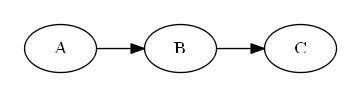

In [8]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

g1 = nx.DiGraph()
g1.add_edges_from([('A', 'B'), ('B', 'C')])
d1 = to_pydot(g1)
d1.set_rankdir('LR')
d1.set_margin(0.2)
Image(d1.create_png(), width=600)

In [13]:
from pgmpy.factors.discrete import TabularCPD

P_A = TabularCPD('A', 3, [[0.1], [0.6], [0.3]])
print(P_A)

+------+-----+
| A(0) | 0.1 |
+------+-----+
| A(1) | 0.6 |
+------+-----+
| A(2) | 0.3 |
+------+-----+


In [28]:
P_B_I_A = TabularCPD('B', 3, np.array([[0.6, 0.2, 0.1], [0.3, 0.5, 0.3], [0.1, 0.3, 0.6]]), evidence=['A'], evidence_card=[3])
print(P_B_I_A)

+------+------+------+------+
| A    | A(0) | A(1) | A(2) |
+------+------+------+------+
| B(0) | 0.6  | 0.2  | 0.1  |
+------+------+------+------+
| B(1) | 0.3  | 0.5  | 0.3  |
+------+------+------+------+
| B(2) | 0.1  | 0.3  | 0.6  |
+------+------+------+------+


In [29]:
print(P_B_I_A * P_A)

+------+----------------------+------+------+
| A    | A(0)                 | A(1) | A(2) |
+------+----------------------+------+------+
| B(0) | 0.06                 | 0.12 | 0.03 |
+------+----------------------+------+------+
| B(1) | 0.03                 | 0.3  | 0.09 |
+------+----------------------+------+------+
| B(2) | 0.010000000000000002 | 0.18 | 0.18 |
+------+----------------------+------+------+


In [30]:
P_B = (P_B_I_A * P_A).marginalize(['A'], inplace=False)
print(P_B)

+------+------+
| B(0) | 0.21 |
+------+------+
| B(1) | 0.42 |
+------+------+
| B(2) | 0.37 |
+------+------+


In [31]:
P_C_I_B = TabularCPD('C', 3, np.array([[0.7, 0.1, 0.1], [0.2, 0.6, 0.1], [0.1, 0.3, 0.8]]), evidence=['B'], evidence_card=[3])
print(P_C_I_B)

+------+------+------+------+
| B    | B(0) | B(1) | B(2) |
+------+------+------+------+
| C(0) | 0.7  | 0.1  | 0.1  |
+------+------+------+------+
| C(1) | 0.2  | 0.6  | 0.1  |
+------+------+------+------+
| C(2) | 0.1  | 0.3  | 0.8  |
+------+------+------+------+


In [32]:
P_C = (P_C_I_B * P_B).marginalize(['B'], inplace=False)
print(P_C)

+------+-------+
| C(0) | 0.226 |
+------+-------+
| C(1) | 0.331 |
+------+-------+
| C(2) | 0.443 |
+------+-------+


In [35]:
from pgmpy.models import BayesianModel

model = BayesianModel([('A', 'B'), ('B', 'C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)
model.check_model()

True

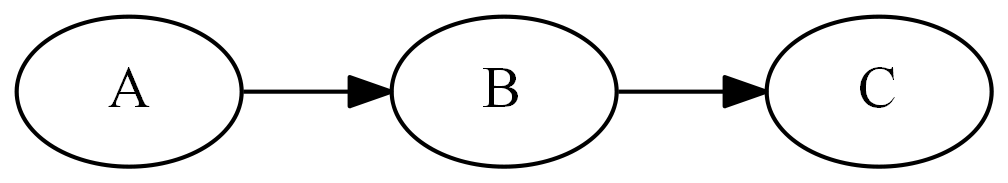

In [36]:
d = to_pydot(model)
d.set_dpi(300)
d.set_rankdir('LR')
d1.set_margin(0.2)
Image(d.create_png(), width=600)

In [37]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)
result = inference.query(variables=['C'])
print(result)

Eliminating: B: 100%|██████████| 2/2 [00:00<00:00, 334.13it/s]

+------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.2260 |
+------+----------+
| C(1) |   0.3310 |
+------+----------+
| C(2) |   0.4430 |
+------+----------+


#### 베이지안 네트워크의 결합확률분포

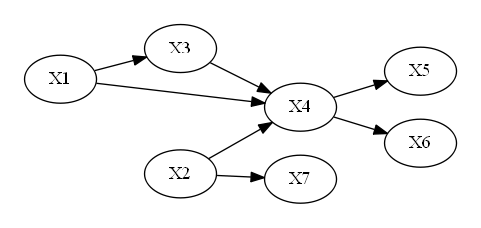

In [27]:
g2 = nx.DiGraph()
g2.add_edges_from([('X1', 'X3'), ('X1', 'X4'), ('X3', 'X4'), ('X2', 'X4'), ('X2', 'X7'), ('X4', 'X5'), ('X4', 'X6')])
d2 = to_pydot(g2)
d2.set_rankdir('LR')
d2.set_margin(0.2)
Image(d2.create_png(), width=800)

#### 방향성 분리

##### 꼬리-꼬리 결합

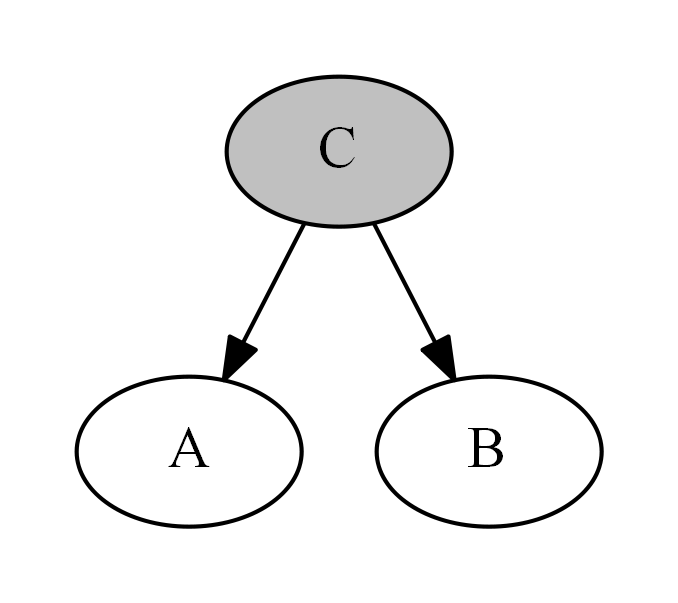

In [44]:
g2 = nx.DiGraph()
g2.add_edges_from([('C', 'A'), ('C', 'B')])
d2 = to_pydot(g2)
d2.get_node('C')[0].set_fillcolor('grey')
d2.get_node('C')[0].set_style('filled')
d2.set_dpi(300)
d2.set_margin(0.2)
Image(d2.create_png(), width=400)

##### 머리-꼬리 결합

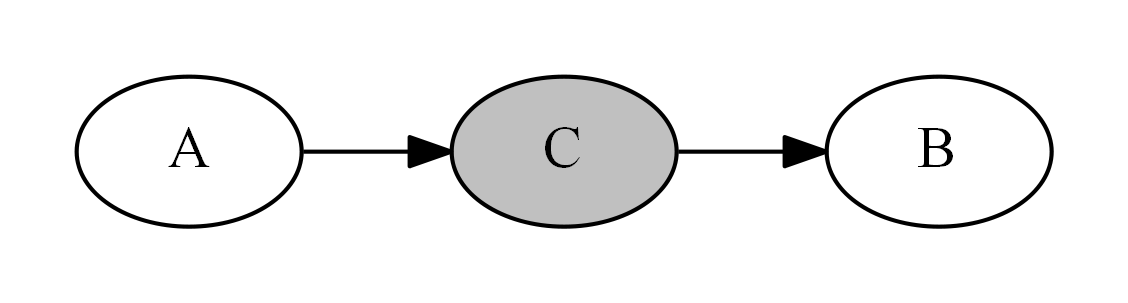

In [48]:
g3 = nx.DiGraph()
g3.add_edges_from([('A', 'C'), ('C', 'B')])
d3 = to_pydot(g3)
d3.get_node('C')[0].set_fillcolor('grey')
d3.get_node('C')[0].set_style('filled')
d3.set_dpi(300)
d3.set_rankdir("LR")
d3.set_margin(0.2)
Image(d3.create_png(), width=600)

#### 머리-머리 결합

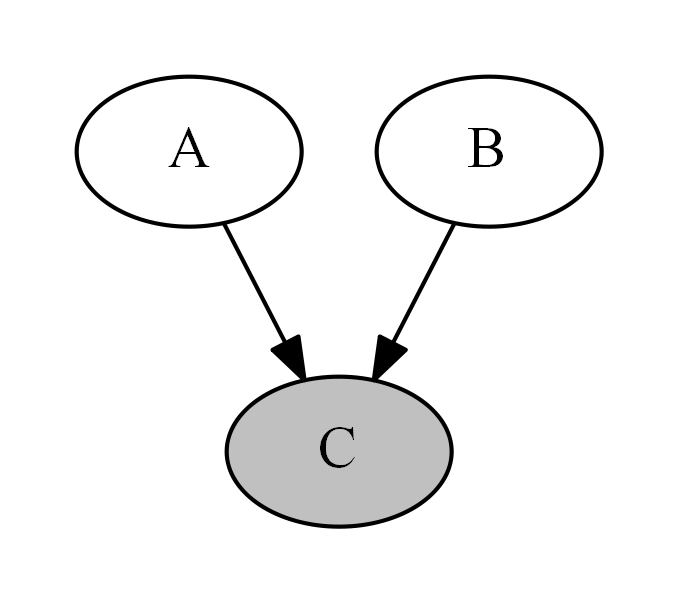

In [49]:
g4 = nx.DiGraph()
g4.add_edges_from([('A', 'C'), ('B', 'C')])
d4 = to_pydot(g4)
d4.get_node('C')[0].set_fillcolor('grey')
d4.get_node('C')[0].set_style('filled')
d4.set_dpi(300)
d4.set_margin(0.2)
Image(d4.create_png(), width=400)

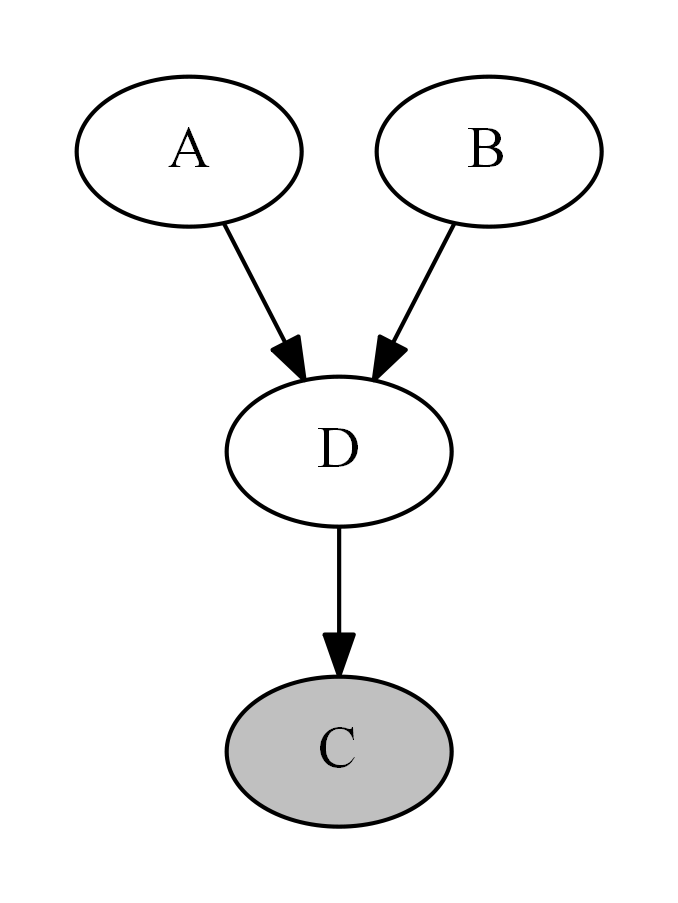

In [52]:
g5 = nx.DiGraph()
g5.add_edges_from([('A', 'D'), ('B', 'D'), ('D', 'C')])
d5 = to_pydot(g5)
d5.get_node('C')[0].set_fillcolor('grey')
d5.get_node('C')[0].set_style('filled')
d5.set_dpi(300)
d5.set_margin(0.2)
Image(d5.create_png(), width=400)

### 마코프 네트워크

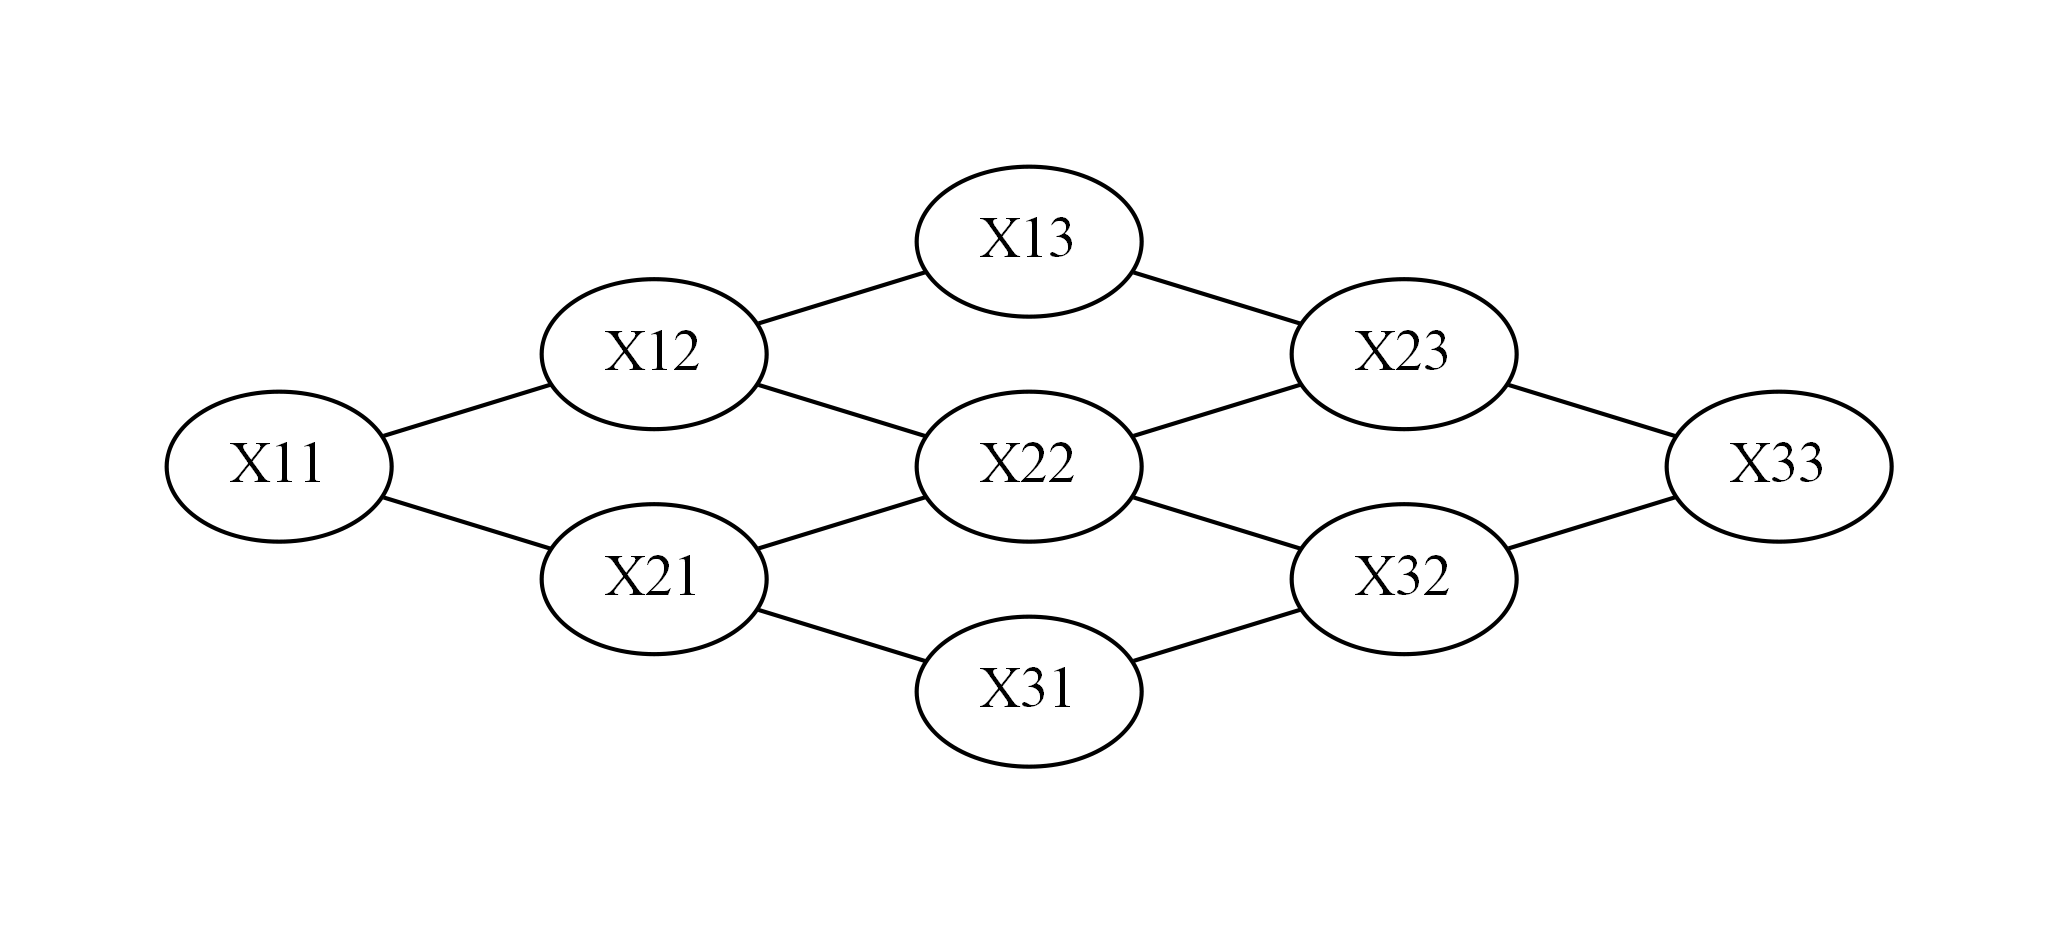

In [54]:
g1 = nx.Graph()
g1.add_edges_from([('X11', 'X12'), ('X11', 'X21'), 
                   ('X12', 'X13'), ('X12', 'X22'), ('X21', 'X22'), ('X21', 'X31'),
                   ('X13', 'X23'), ('X22', 'X23'), ('X22', 'X32'), ('X31', 'X32'), 
                   ('X23', 'X33'), ('X32', 'X33')])
d1 = to_pydot(g1)
d1.set_dpi(300)
d1.set_margin(0.5)
d1.set_rankdir('LR')
Image(d1.create_png(), width=600)

#### 클리크와 팩터

In [55]:
from pgmpy.factors.discrete import DiscreteFactor

phi = DiscreteFactor(['x1', 'x2', 'x3'], [2, 2, 2], np.arange(8))
print(phi)

+-------+-------+-------+-----------------+
| x1    | x2    | x3    |   phi(x1,x2,x3) |
+=======+=======+=======+=================+
| x1(0) | x2(0) | x3(0) |          0.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(0) | x3(1) |          1.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(1) | x3(0) |          2.0000 |
+-------+-------+-------+-----------------+
| x1(0) | x2(1) | x3(1) |          3.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(0) | x3(0) |          4.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(0) | x3(1) |          5.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(1) | x3(0) |          6.0000 |
+-------+-------+-------+-----------------+
| x1(1) | x2(1) | x3(1) |          7.0000 |
+-------+-------+-------+-----------------+


In [56]:
print(P_B_I_A.to_factor())

+------+------+------------+
| B    | A    |   phi(B,A) |
+======+======+============+
| B(0) | A(0) |     0.6000 |
+------+------+------------+
| B(0) | A(1) |     0.2000 |
+------+------+------------+
| B(0) | A(2) |     0.1000 |
+------+------+------------+
| B(1) | A(0) |     0.3000 |
+------+------+------------+
| B(1) | A(1) |     0.5000 |
+------+------+------------+
| B(1) | A(2) |     0.3000 |
+------+------+------------+
| B(2) | A(0) |     0.1000 |
+------+------+------------+
| B(2) | A(1) |     0.3000 |
+------+------+------------+
| B(2) | A(2) |     0.6000 |
+------+------+------------+


In [57]:
print(P_B_I_A.to_factor().reduce([('B', 0)], inplace=False))

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.6000 |
+------+----------+
| A(1) |   0.2000 |
+------+----------+
| A(2) |   0.1000 |
+------+----------+


In [58]:
print(P_B_I_A.to_factor().reduce([('B', 0)], inplace=False).normalize(inplace=False))

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.6667 |
+------+----------+
| A(1) |   0.2222 |
+------+----------+
| A(2) |   0.1111 |
+------+----------+


In [59]:
print(P_B_I_A.to_factor().reduce([('A', 1)], inplace=False))

+------+----------+
| B    |   phi(B) |
+======+==========+
| B(0) |   0.2000 |
+------+----------+
| B(1) |   0.5000 |
+------+----------+
| B(2) |   0.3000 |
+------+----------+


#### 마코프 네트워크의 확률분포

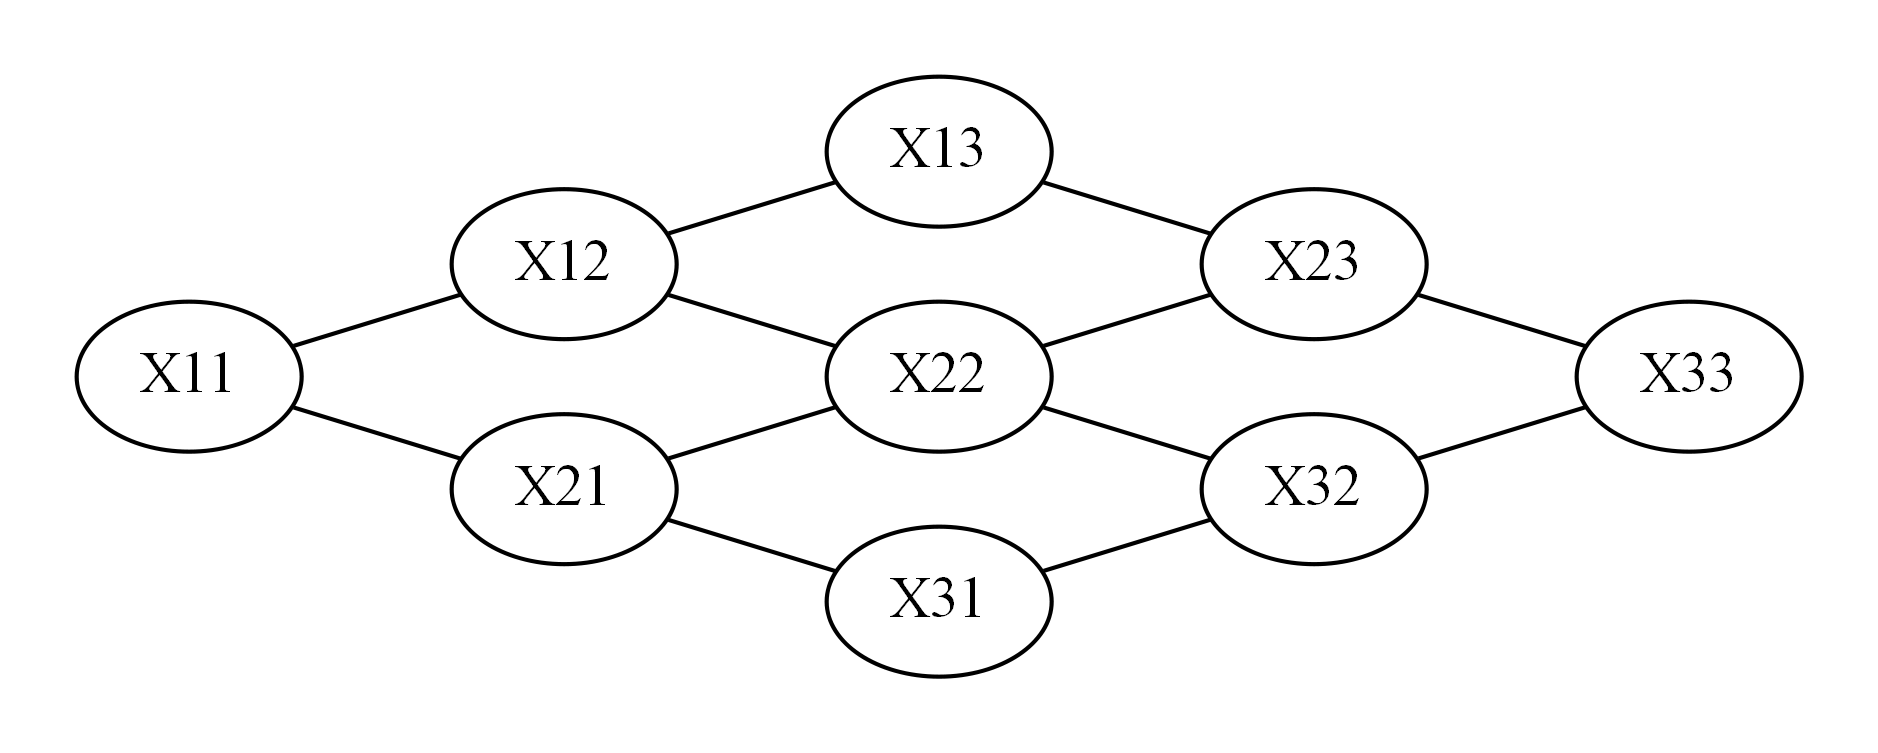

In [76]:
from pgmpy.models import MarkovModel

ginfo = [('X11', 'X12'), ('X11', 'X21'), 
         ('X12', 'X13'), ('X12', 'X22'), ('X21', 'X22'), ('X21', 'X31'),
         ('X13', 'X23'), ('X22', 'X23'), ('X22', 'X32'), ('X31', 'X32'), 
         ('X23', 'X33'), ('X32', 'X33')]

model = MarkovModel(ginfo)

d = to_pydot(model)
d.set_dpi(300)
d.set_margin(0.2)
d.set_rankdir('LR')
Image(d.create_png(), width=600)

In [77]:
from pgmpy.factors.discrete import DiscreteFactor

factor = DiscreteFactor(['X11', 'X12'], cardinality=[2, 2], values=[[10, 1], [1, 10]])
model.add_factors(factor)

#### 이미지 완성

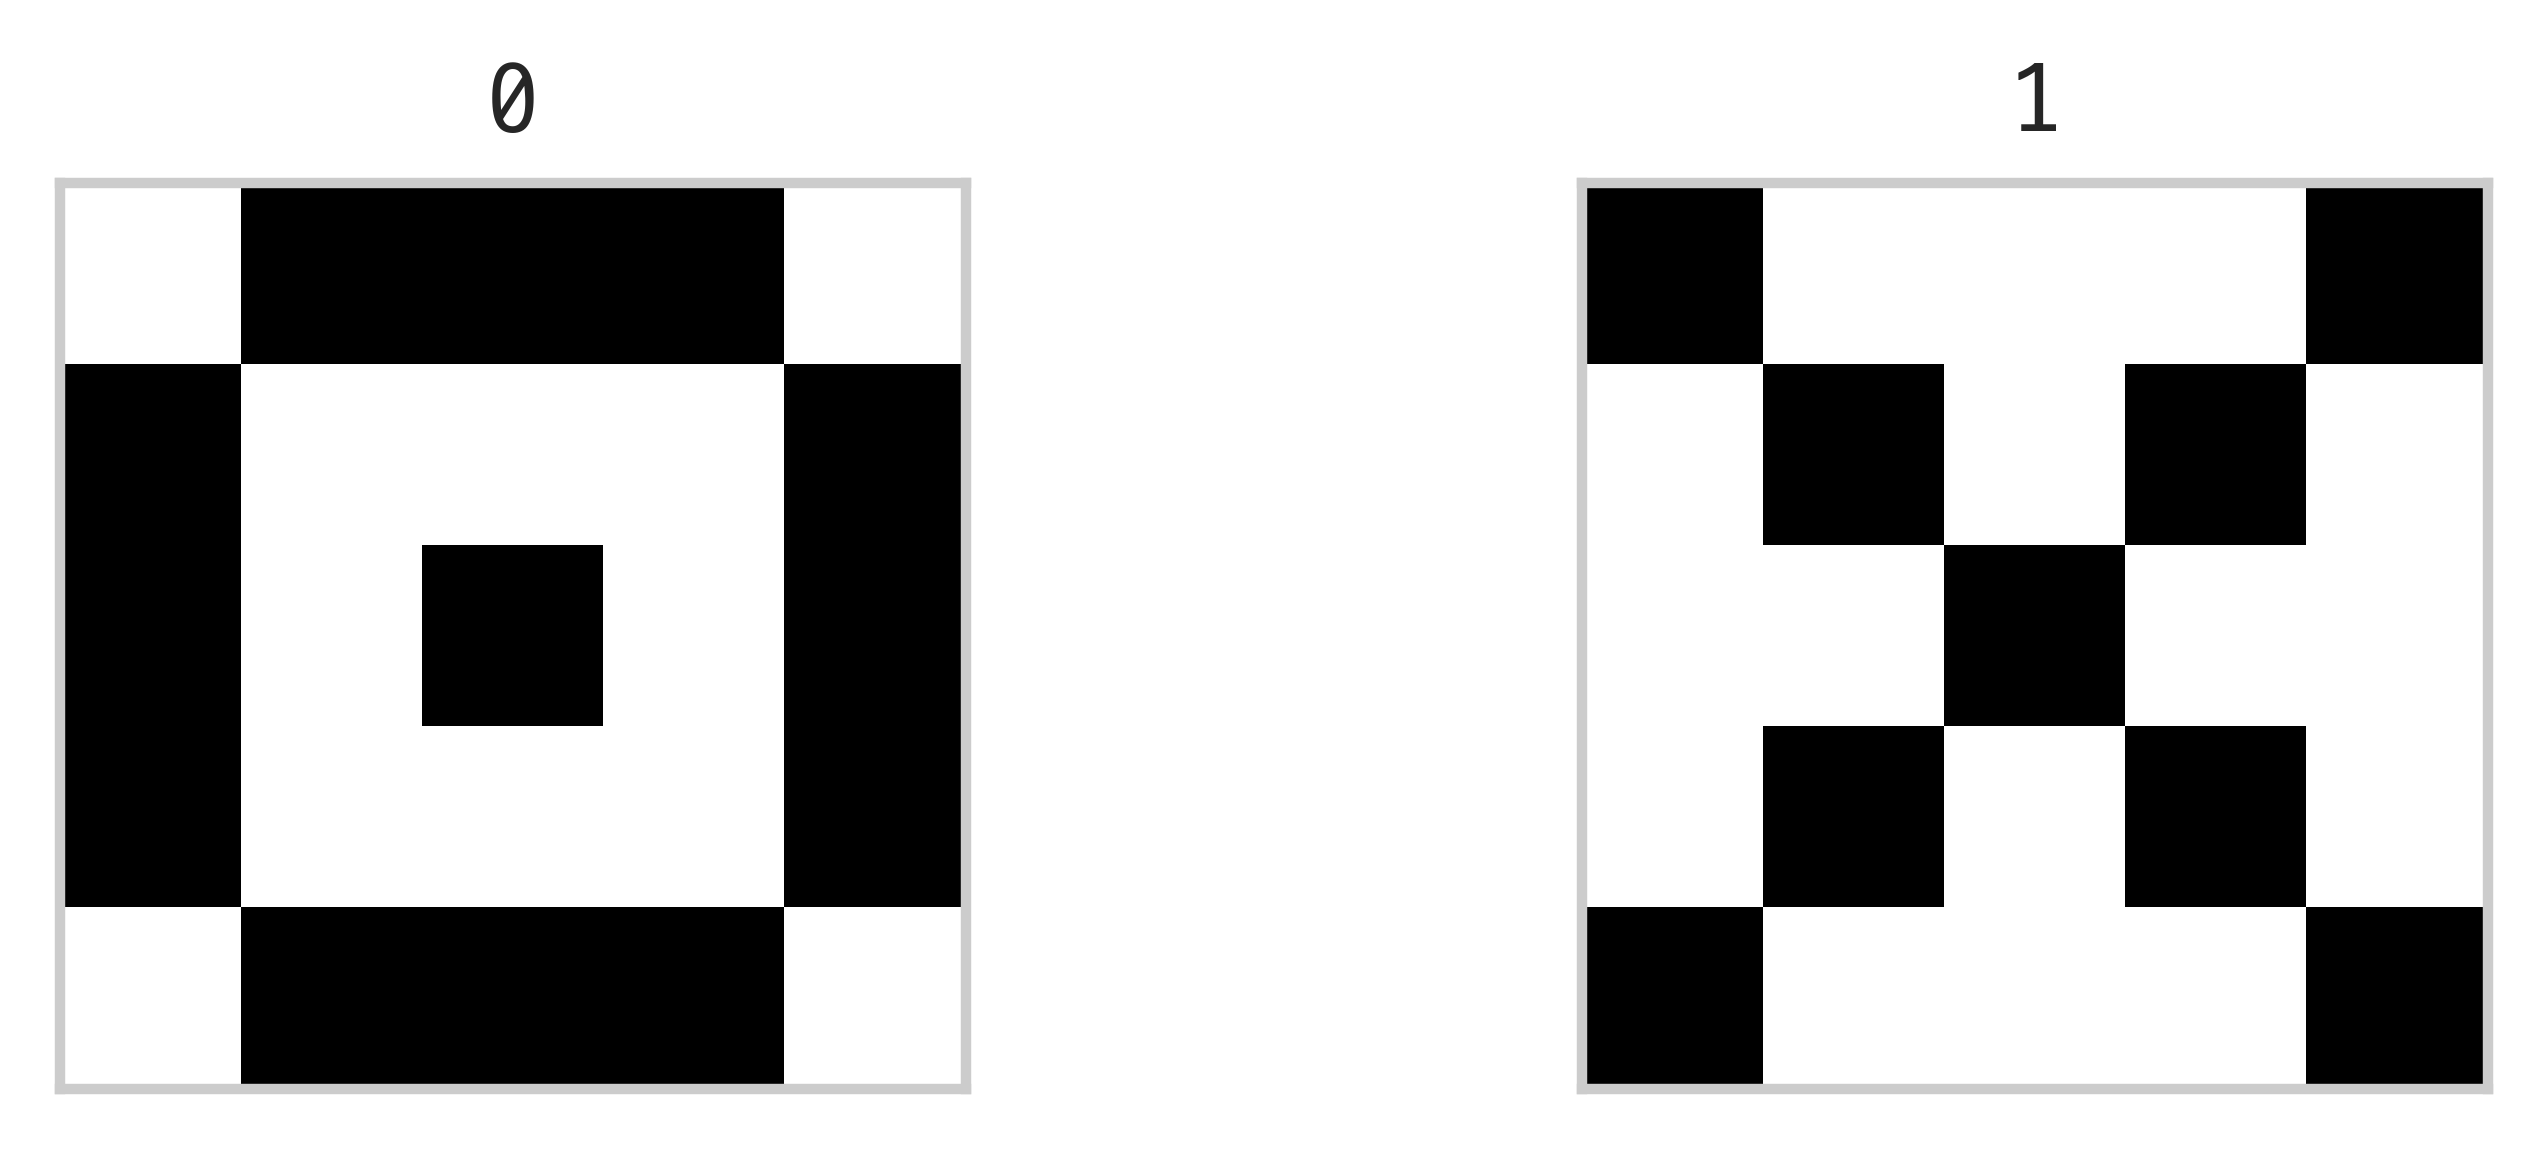

In [2]:
n_char = 2
images = np.zeros((n_char, 5, 5))
idx = []
idx.append(np.array([
    (0, 1), (0, 2), (0, 3), (1, 0), (1, 4), (2, 0), (2, 2), (2, 4), (3, 0), (3, 4), (4, 1), (4, 2), (4, 3)]))
idx.append(np.array([
    (0, 0), (0, 4), (1, 1), (1, 3), (2, 2), (3, 1), (3, 3), (4, 0), (4, 4)]))
for k, idx in enumerate(idx):
    for i, j in idx:
        images[k, i, j] = 1

plt.figure(figsize=(6, 2))
for i in range(n_char):
    plt.subplot(1, n_char, i + 1)
    plt.imshow(images[i], cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title(i)

In [3]:
from pgmpy.models import MarkovModel
from pgmpy.factors.discrete import DiscreteFactor

def get_factor(v1, v2, idx1, idx2):
    p00 = p01 = p10 = p11 = 0
    for k in range(num_images):
        if images[k, idx1[0], idx1[1]] == 0 and images[k, idx2[0], idx2[1]] == 0:
            p00 += 1
        if images[k, idx1[0], idx1[1]] == 0 and images[k, idx2[0], idx2[1]] == 1:
            p01 += 1
        if images[k, idx1[0], idx1[1]] == 1 and images[k, idx2[0], idx2[1]] == 0:
            p10 += 1
        if images[k, idx1[0], idx1[1]] == 1 and images[k, idx2[0], idx2[1]] == 1:
            p11 += 1
    factor = DiscreteFactor([v1, v2], cardinality=[2, 2], values=[[p00, p01], [p10, p11]])
    return factor

model = MarkovModel()

num_images = images.shape[0]
n1 = images.shape[1]
n2 = images.shape[2]
for i in range(n1):
    for j in range(n2):
        if j < n2 - 1:
            v1 = 'X{}{}'.format(i + 1, j + 1)
            v2 = 'X{}{}'.format(i + 1, j + 2)
            model.add_edge(v1, v2)
            factor = get_factor(v1, v2, (i, j), (i, j + 1))
            model.add_factors(factor)
        if i < n1 - 1:
            v1 = 'X{}{}'.format(i + 1, j + 1)
            v2 = 'X{}{}'.format(i + 2, j + 1)
            model.add_edge(v1, v2)
            factor = get_factor(v1, v2, (i, j), (i + 1, j))
            model.add_factors(factor)
    
model.check_model()

True

In [4]:
f = model.get_factors('X11')[0]
f

<DiscreteFactor representing phi(X11:2, X12:2) at 0x1f8ce1f33c8>

In [5]:
print(f)

+--------+--------+----------------+
| X11    | X12    |   phi(X11,X12) |
+========+========+================+
| X11(0) | X12(0) |         0.0000 |
+--------+--------+----------------+
| X11(0) | X12(1) |         1.0000 |
+--------+--------+----------------+
| X11(1) | X12(0) |         1.0000 |
+--------+--------+----------------+
| X11(1) | X12(1) |         0.0000 |
+--------+--------+----------------+


In [6]:
d = to_pydot(model)
d.set_dpi(300)
d.set_margin(0.2)
d.set_rankdir('LR')
Image(d.create_png(), width=800)

NameError: name 'to_pydot' is not defined

In [7]:
from pgmpy.inference import BeliefPropagation
inference = BeliefPropagation(model)

vars = []
for i in range(n1):
    for j in range(n2):
        vars.append('X{}{}'.format(i + 1, j + 1))
    
evidence1 = {
    'X11': 0, 'X21': 1, 'X31': 1, 'X41': 1, 'X51': 0,
    'X15': 0, 'X25': 1, 'X35': 1, 'X45': 1, 'X55': 0,
}
evidence2 = {
    'X11': 1, 'X21': 0, 'X31': 0, 'X41': 0, 'X51': 1,
    'X15': 1, 'X25': 0, 'X35': 0, 'X45': 0, 'X55': 1,
}

evidence = evidence1

for x in evidence:
    vars.remove(x)
    
result = inference.map_query(variables=vars, evidence=evidence)
result.update(evidence)

image = np.zeros((n1, n2))
for i in range(n1):
    for j in range(n2):
        image[i, j] = result['X{}{}'.format(i + 1, j + 1)]
    
print(image)

C:\Anaconda\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:708: RuntimeWarning: invalid value encountered in true_divide
  phi.values = phi.values / phi1.values
0it [00:00, ?it/s]

[[0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0.]]


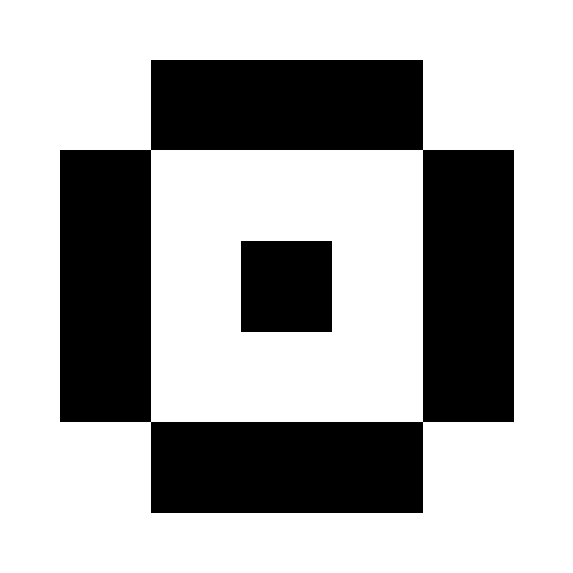

In [8]:
plt.figure(figsize=(5, 1))
plt.imshow(image, cmap=plt.cm.bone_r)
plt.axis('off')
plt.show()